In [1]:
#cloning the git-hub repo
!rm -fr pytorch-image-models
!git clone https://github.com/rwightman/pytorch-image-models.git
!pip install -r pytorch-image-models/requirements.txt -q
!pip install timm -q
!mv pytorch-image-models pytorch_image_models

Cloning into 'pytorch-image-models'...
remote: Enumerating objects: 12073, done.
remote: Counting objects: 100% (326/326), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 12073 (delta 177), reused 291 (delta 160), pack-reused 11747
Receiving objects: 100% (12073/12073), 21.71 MiB | 18.67 MiB/s, done.
Resolving deltas: 100% (8660/8660), done.
     |████████████████████████████████| 182 kB 4.8 MB/s 
     |████████████████████████████████| 549 kB 5.1 MB/s 


In [33]:
# Importing the required libraries
from timm.models.vision_transformer import vit_tiny_patch16_384
import matplotlib.pyplot as plt
import torch
import urllib
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
from time import time
from torch.nn.functional import softmax
from torch import topk

In [34]:
# Function to get random animal images from unsplash
def random_image(show=False):
  url, file_name = ("https://source.unsplash.com/random?animal", "animal.jpg")
  urllib.request.urlretrieve(url, file_name)
  img = Image.open(file_name).convert('RGB')
  if show:
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.show()
  return img

In [35]:
# Function to get the image net classes from the github repo
def get_classes():
  url, file_name = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
  urllib.request.urlretrieve(url, file_name) 
  with open("imagenet_classes.txt", "r") as f:
    classes = [s.strip() for s in f.readlines()]
  return classes

In [36]:
#Function to test the model
def test_model():
  # load vit_tiny_patch16_384 model and resolve config for transforming the input
  model = vit_tiny_patch16_384(pretrained=True)
  config = resolve_data_config({}, model=model)
  transform = create_transform(**config)
  
  # get input image
  img = random_image(show=True)
  # transform and add batch dimension
  tensor = transform(img).unsqueeze(0) 

  # testing the model we don't need to keep track of gradient for testing
  with torch.no_grad():
    #start time
    t = time()
    # output of the model
    output = model(tensor)
    print(f"Run_time {time() - t}\n")
    probabilities = softmax(output[0], dim=0)

    # get classes from imagenet
    classes = get_classes()
    # taking top 5 classes from the classes list
    prob, cls = topk(probabilities, 5)
    for i in range(prob.size(0)):
      print(classes[cls[i]], round(prob[i].item(),4))

  


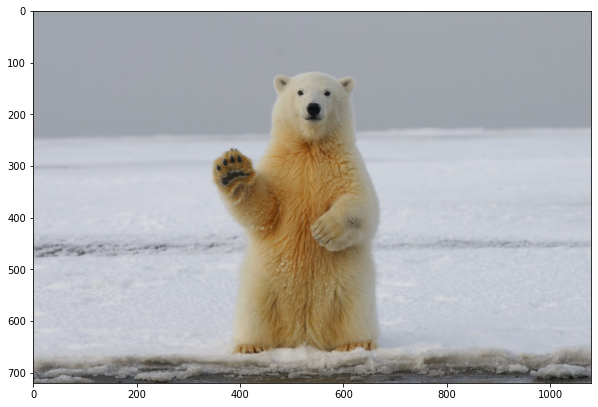

Run_time 0.6031625270843506

ice bear 0.9963
brown bear 0.0012
weasel 0.0008
white wolf 0.0004
golden retriever 0.0003


In [37]:
test_model()